In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [8]:
df = pd.read_csv(filename, names = headers)
df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


### Finding and fixing missing values

In [10]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
missed_data =  df.isnull()
for cl in missed_data.columns.values.tolist():
    print(cl)
    print(missed_data[cl].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [14]:
missed_data.columns.values.tolist() #convert df columns to the list

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [16]:
normal_loss_avg = df["normalized-losses"].astype('float').mean(axis=0)
print("Average of normalized-losses:", normal_loss_avg)

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

avg_stroke=df['stroke'].astype('float').mean(axis=0)
print("Average of strokee:", avg_stroke)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

df["normalized-losses"].replace(np.nan,normal_loss_avg, inplace=True )
df["bore"].replace(np.nan,avg_bore, inplace=True )
df["stroke"].replace(np.nan,avg_stroke, inplace=True )
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)


print("The number of doors", df['num-of-doors'].value_counts())
print("The most common type door", df['num-of-doors'].value_counts().idxmax())
most_type= df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, most_type, inplace=True)

Average of normalized-losses: 122.0
Average of bore: 3.3297512437810957
Average of strokee: 3.2554228855721337
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079
The number of doors four    114
two      89
Name: num-of-doors, dtype: int64
The most common type door four


In [17]:
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [19]:
missed_data =  df.isnull()
for cl in missed_data.columns.values.tolist():
    print(cl)
    print(missed_data[cl].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

In [21]:
df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


#### Data format

In [24]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [25]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

### data_standardization

In [27]:
# transform mpg into L/100km by the following equation L/100km = 235 / mpg

df['city-L/100km'] = 235/df["city-mpg"]

In [28]:
# transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km
df['highway-mpg'] = 235/df["highway-mpg"]  
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace='True')

In [30]:
df.head(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667


### Data Normalization

In [31]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [32]:
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning Data

In [33]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0, 0.5, 'count')

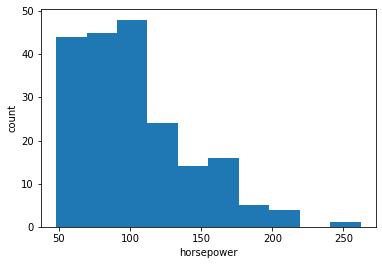

In [35]:
plt.hist(df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

In [38]:
bins = np.linspace(min(df["horsepower"]),max(df["horsepower"]),4)
group_names=['Low', 'Medium', 'High']

#Use cut when you need to segment and sort data values into bins
df['bined-horsepower'] = pd.cut(df['horsepower'], bins, labels = group_names, include_lowest = True)
df['bined-horsepower'].head(4)

0       Low
1       Low
2    Medium
3       Low
Name: bined-horsepower, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [43]:
df[['horsepower','bined-horsepower']].head(4)

,horsepower,bined-horsepower
0,111,Low
1,111,Low
2,154,Medium
3,102,Low


Text(0.5, 1.0, 'horsepower bins')

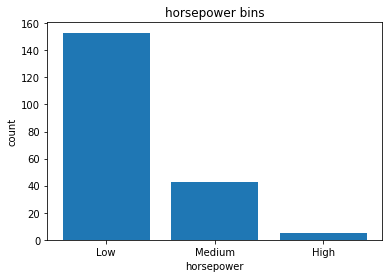

In [46]:
plt.bar(group_names, df["bined-horsepower"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

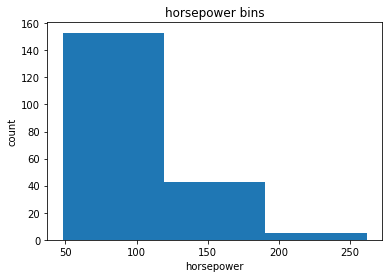

In [47]:
plt.hist(df['horsepower'], bins=3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

### Dummy Variable

In [48]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'bined-horsepower'],
      dtype='object')

In [49]:
dummy_variable = pd.get_dummies(df["fuel-type"])
dummy_variable.head(4)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1


In [50]:
dummy_variable.rename(columns = {'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable.head(4)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1


In [52]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [53]:
dummy_variable_ = pd.get_dummies(df["aspiration"])
dummy_variable_.head(4)

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0


In [54]:
dummy_variable.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable.head(4)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1


In [55]:
df = pd.concat([df, dummy_variable_], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)

In [56]:
# Save the result
df.to_csv('clean_df.csv')